In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import mercury as mr # for widgets



In [2]:
df_empresas = pd.read_csv(r'comportamiento-empresas.csv')
df_dolar = pd.read_csv(r'dolar.txt')
df_indices = pd.read_csv(r'indices.csv')

df_empresas['name'] = df_empresas['name'].str.upper()
df_empresas['year'] = round(df_empresas['year']).astype(int)

empresas_unicas = df_empresas['name'].unique()
empresas_dropdown = widgets.Dropdown(options=empresas_unicas, description='Empresa:')

In [5]:
def mostrar_grafico(empresa):
    datos_empresa = df_empresas[df_empresas['name'] == empresa]

    if datos_empresa.empty:
        print(f"No hay datos disponibles para {empresa}.")
        return

    fig, ax1 = plt.subplots(figsize=(10, 6))

    datos_no_2023 = datos_empresa[datos_empresa['year'] != 2023]

    ax1.bar(datos_no_2023['year'], datos_no_2023['claims'], color='c')
    ax1.set_title(f'Reclamos durante la pandemia - {empresa}')
    ax1.set_xlabel('Año')
    ax1.set_ylabel('Cantidad de Reclamos')
    ax1.axvspan(2020, 2022, alpha=0.2, color='red', label='Años de Pandemia')

    ax1.set_xticks(datos_no_2023['year'])
    ax1.set_xticklabels(datos_no_2023['year'].astype(int), rotation=45)

    for year, claims in zip(datos_no_2023['year'], datos_no_2023['claims']):
        ax1.text(year, claims, str(claims), ha='center', va='bottom')


    ax1.plot(df_dolar['Anio'], df_dolar['ValorDolar'], marker='o', linestyle='-', color='green', label='Dólar')

    for i, row in df_dolar.iterrows():
        ax1.annotate(f"${row['ValorDolar']:.2f}", (row['Anio'], row['ValorDolar']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

    ax1.legend()
    plt.tight_layout()
    plt.show()

In [57]:
widgets.interactive(mostrar_grafico, empresa=empresas_dropdown)

interactive(children=(Dropdown(description='Empresa:', options=('WEPLAY', 'TRICOT', 'THE NORTH FACE - ROXY - Q…

interactive(children=(Dropdown(description='Empresa:', options=('WEPLAY', 'TRICOT', 'THE NORTH FACE - ROXY - Q…

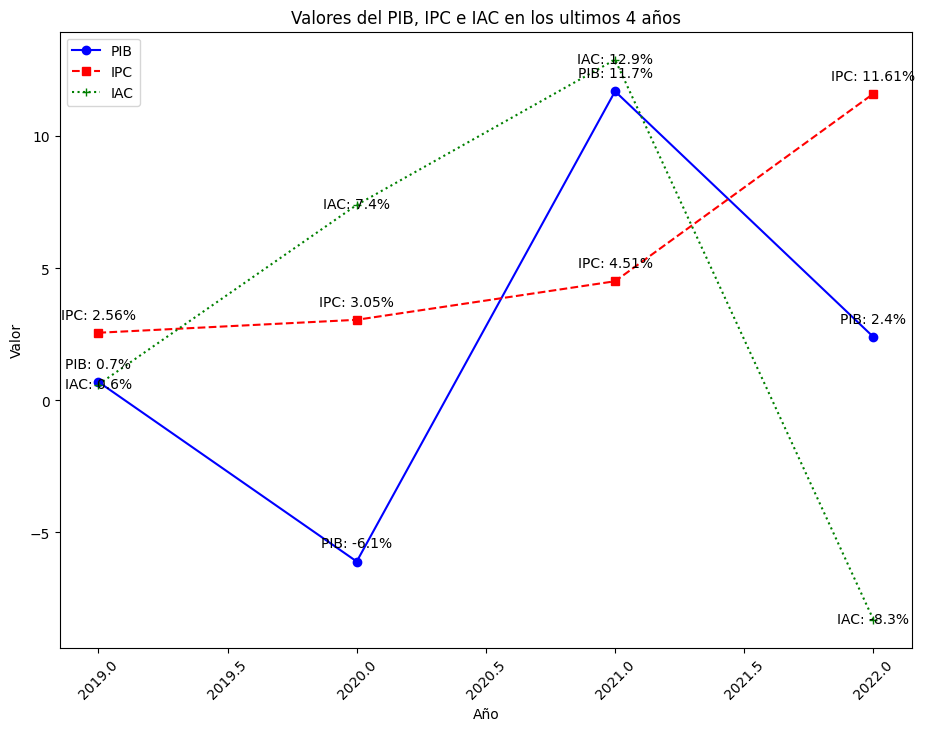

In [39]:
pib_data = df_indices[df_indices['nombre'] == 'PIB']
ipc_data = df_indices[df_indices['nombre'] == 'IPC']
iac_data = df_indices[df_indices['nombre'] == 'IAC']
ventas_data = df_indices[df_indices['nombre'] == 'VENTAS RETAIL']

plt.figure(figsize=(11, 8))
plt.plot(pib_data['anio'], pib_data['valor'], label='PIB', marker='o', linestyle='-', color='blue')
plt.plot(ipc_data['anio'], ipc_data['valor'], label='IPC', marker='s', linestyle='--', color='red')
plt.plot(iac_data['anio'], iac_data['valor'], label='IAC', marker='+', linestyle=':', color='green')
#plt.plot(ventas_data['anio'], ventas_data['valor'], label='VENTAS RETAIL', marker='x', linestyle='-', color='purple')

for x, y_pib in zip(pib_data['anio'], pib_data['valor']):
    if x in ipc_data['anio'].values:
        y_ipc = ipc_data[ipc_data['anio'] == x]['valor'].values[0]
        y_iac = iac_data[iac_data['anio'] == x]['valor'].values[0]
        y_ventas = ventas_data[ventas_data['anio'] == x]['valor'].values[0]
        plt.annotate(f'PIB: {y_pib}%', (x, y_pib), textcoords="offset points", xytext=(0, 10), ha='center')
        plt.annotate(f'IPC: {y_ipc}%', (x, y_ipc), textcoords="offset points", xytext=(0, 10), ha='center')
        plt.annotate(f'IAC: {y_iac}%', (x, y_iac), textcoords="offset points", xytext=(0, -2.5), ha='center')

        plt.xticks(rotation=45)

plt.title('Valores del PIB, IPC e IAC en los ultimos 4 años')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend()


plt.show()


In [8]:
df = pd.read_csv('comportamiento-empresas.csv')

remove_2023_mask = df['year'] < 2023
df = df[remove_2023_mask]


In [50]:
def plot_company(ax, name, year_risk):
    color_1 = 'red'
    color_2 = 'blue'
    ax[0][0].clear()
    ax[0][0].bar(df[df['name'] == name]['year'] - 0.2, df[df['name'] == name]['claims'], width=0.2, color=color_1, label="reclamos")
    #plt.legend()
    ax[0][0].set_xlabel('Año')
    ax[0][0].set_ylabel('Reclamos')
    ax[0][0].set_title(f'Reclamos por año en {name}')
    
    plt.xticks(df[df['name'] == name]['year'])

    ax[0][0].bar(df[df['name'] == name]['year'] + 0., df[df['name'] == name]['claims'] * (df[df['name'] == name]['response mean']/100),
           width=0.2,
           color='green',
           alpha=0.5,
           label="reclamos respondidos")
    
    ax[0][0].bar(df[df['name'] == name]['year'] + 0.2, (df[df['name'] == name]['solved mean']/100)*(df[df['name'] == name]['claims'] * (df[df['name'] == name]['response mean']/100)),
           width=0.2,
           color=color_2,
           alpha=0.5,
           label="reclamos resueltos")
    
    #ax[0][0].plot(df[df['name'] == name]['year'] + 0.2, (df[df['name'] == name]['solved mean']/100)*(df[df['name'] == name]['claims'] * (df[df['name'] == name]['response mean']/100)),
    #       color='purple',
    #       alpha=0.5,
    #       label="tendencia reclamos resueltos")
    ax2 = ax[0][0].twinx()  # instantiate a second axes that shares the same x-axis

    ax2.plot(pib_data['anio'], pib_data['valor'], label='PIB', marker='o', linestyle='-', color='blue')
    ax2.plot(ipc_data['anio'], ipc_data['valor'], label='IPC', marker='s', linestyle='--', color='red')
    ax2.plot(iac_data['anio'], iac_data['valor'], label='IAC', marker='+', linestyle=':', color='green')

    for x, y_pib in zip(pib_data['anio'], pib_data['valor']):
        if x in ipc_data['anio'].values:
            y_ipc = ipc_data[ipc_data['anio'] == x]['valor'].values[0]
            y_iac = iac_data[iac_data['anio'] == x]['valor'].values[0]
            y_ventas = ventas_data[ventas_data['anio'] == x]['valor'].values[0]
            ax2.annotate(f'PIB: {y_pib}%', (x, y_pib), textcoords="offset points", xytext=(0, 10), ha='center')
            ax2.annotate(f'IPC: {y_ipc}%', (x, y_ipc), textcoords="offset points", xytext=(0, 10), ha='center')
            ax2.annotate(f'IAC: {y_iac}%', (x, y_iac), textcoords="offset points", xytext=(0, -2.5), ha='center')


    if year_risk > 2019:
        tasa = (df[df['name'] == name][df['year']==year_risk]['claims'].values[0] - df[df['name'] == name][df['year']==int(year_risk)-1]['claims'].values[0]) / df[df['name'] == name][df['year']==int(year_risk)-1]['claims'].values[0]
        wedgeprops = {'width':0.2, 'edgecolor':'black', 'linewidth':2}
        ax[0][1].pie([abs(tasa)*100, 100-(abs(tasa)*100)], wedgeprops=wedgeprops, startangle=90, colors=['#5DADE2', '#515A5A'])
        ax[0][1].set_title('Variación reclamos último año', fontsize=18, loc='center')
        ax[0][1].text(0, 0, f"{round(tasa*100, 1)}%", ha='center', va='center', fontsize=25)


        eficiencia_resolucion = (df[df['name'] == name][df['year']==year_risk]['solved mean'].values[0] - df[df['name'] == name][df['year']==int(year_risk)-1]['solved mean'].values[0]) / df[df['name'] == name][df['year']==int(year_risk)-1]['solved mean'].values[0]
    #    print(f"La eficiencia de resolución ha aumentado en un: {eficiencia_resolucion*100}%")

        wedgeprops = {'width':0.2, 'edgecolor':'black', 'linewidth':2}
        ax[1][1].pie([abs(eficiencia_resolucion)*100, 100-(abs(eficiencia_resolucion)*100)], wedgeprops=wedgeprops, startangle=90, colors=['#5DADE2', '#515A5A'])
        ax[1][1].set_title('Crecimiento eficiencia resolución vs periodo anterior', fontsize=18, loc='center')
        ax[1][1].text(0, 0, f"{round(eficiencia_resolucion*100, 1)}%", ha='center', va='center', fontsize=25)

    #ax.legend()
    plt.legend()
    
    company = df[df['name'] == name]
    display(company[company['year'] == year_risk])
    ax[1][0].axis('off')

    ax[1][0].set_title('Indice de riesgo reclamos', fontsize=10, loc='center')
    if int(company[company['year'] == year_risk]['mean days'].values[0]) > 7:
        
        ax[1][0].text(0.5, 0.5, f"RIESGOSO: Demoras más de 7 días en\n promedio en dar solución a los reclamos", ha='center', va='center', fontsize=18, color='red')
    else:
        #BAJO LA MEDIA DEL MERCADO
        if (company[company['year'] == year_risk]['solved mean'].values[0]) < (company[company['year'] == year_risk]['market mean solved'].values[0]):
            #
            if (year_risk > 2019) and (company[company['year'] == year_risk]['solved mean'].values[0] < company[company['year'] == year_risk-1]['solved mean'].values[0] ):
                
                ax[1][0].text(0.5, 0.5, "RIESGOSO\n La tasa de reclamos resueltos disminuyó vs el año anterior", ha='center', va='center', fontsize=18, color='red')

            else:

                ax[1][0].text(0.5, 0.5, "Riesgo Medio\n Has dado menos solución a los reclamos comparado con el promedio del mercado", ha='center', va='center', fontsize=18, color='orange')
        else:
            ax[1][0].text(0.5, 0.5, "Situacion normal", ha='center', va='center', fontsize=18, color='green')
    plt.show()

def plot_company_interaction(name, year_risk):
    fig, ax = plt.subplots(2,2,figsize=(18, 12), tight_layout=True)
    plot_company(ax, name, year_risk)

In [51]:

widgets.interact(plot_company_interaction, name=df['name'].unique(), year_risk=range(2019, 2022+1))


interactive(children=(Dropdown(description='name', options=('WEPLAY', 'TRICOT', 'THE NORTH FACE - ROXY - QUICK…

<function __main__.plot_company_interaction(name, year_risk)>

In [56]:
df_financieras = pd.read_csv('reclamosFinancieros.csv')
df_financieras

,name,year,claims,market claims,solved mean,market mean solved,response mean,market response mean,mean days,mean days market
0,AUTOFIN,2019,126,88503.0,70.7,51.9,100.0,97.7,6,6.0
1,AUTOFIN,2020,176,118409.0,64.1,48.9,100.0,97.5,7,6.0
2,AUTOFIN,2021,130,91793.0,66.4,48.1,100.0,98.0,6,5.0
3,AUTOFIN,2022,147,113259.0,47.8,50.8,100.0,97.5,7,6.0
4,BANCO BCI,2019,2954,88503.0,56.4,51.9,99.7,97.7,5,6.0
...,...,...,...,...,...,...,...,...,...,...
235,GLOBAL SOLUCIONES,2022,77,113259.0,56.7,50.8,100.0,97.5,3,6.0
236,FORUM SERVICIOS FINANCIEROS,2019,705,88503.0,54.5,51.9,99.3,97.7,6,6.0
237,FORUM SERVICIOS FINANCIEROS,2020,1386,118409.0,55.2,48.9,99.3,97.5,5,6.0
238,FORUM SERVICIOS FINANCIEROS,2021,1034,91793.0,68.1,48.1,99.4,98.0,5,5.0
